# Analyze Medical Costs Using Regression Tools


### Author: Cera Drake
### Data: 04/20/2025
### Objective: We have a data set of medical costs for individuals. Using different tools, I am going to see if there is any correlation between certain personal factors and higher medical costs

### Section 1: Import and Inspect Data

In [22]:
#Display first 10 rows
import pandas as pd
df = pd.read_csv("insurance.csv")
df.info()
print('The first five 10 rows of the dataset:')
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
The first five 10 rows of the dataset:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [23]:
# Inspect data - Check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [24]:
# Display the summary statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##### Reflection: This data set contains no missing values. However, the max charge is a lot higher than the mean, which means the data could be right skewed. This could affect the different models that I will use. 

### Section 2.1 Explore Data Patterns and Distributions

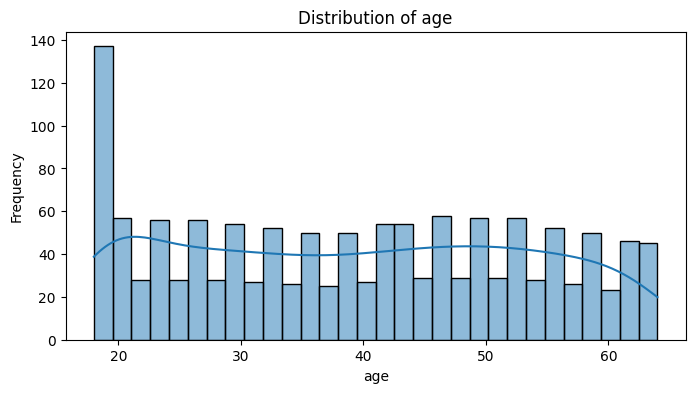

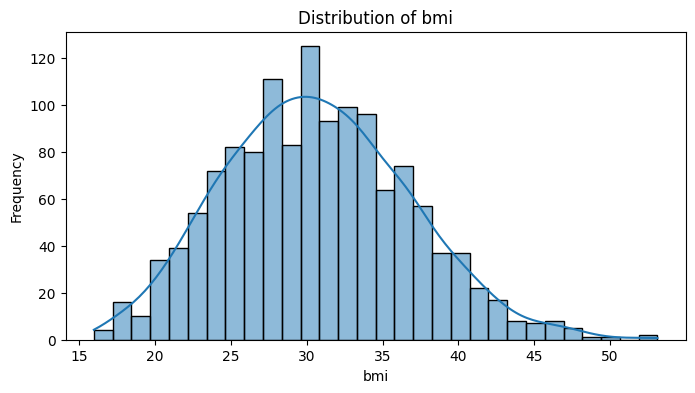

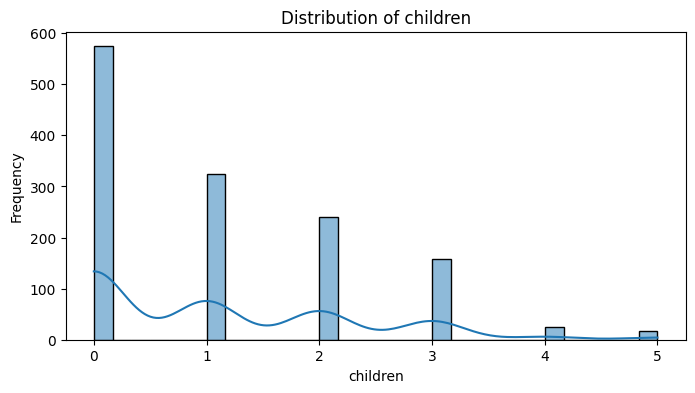

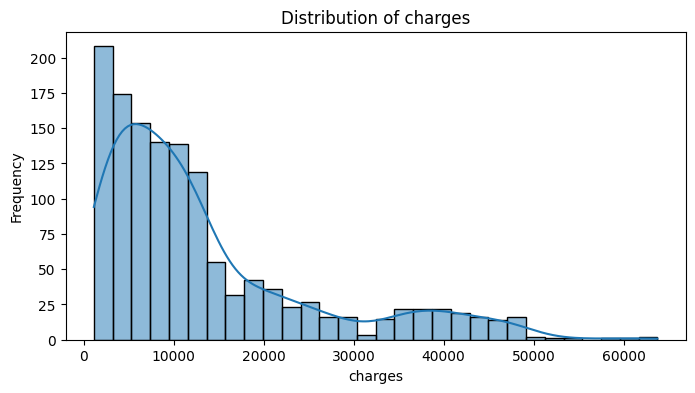

In [25]:
# Create histogram for the numerical data
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = ['age', 'bmi', 'children', 'charges']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    plt.title(f'Distribution of {col}')
    sns.histplot(df[col], kde=True, bins=30)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

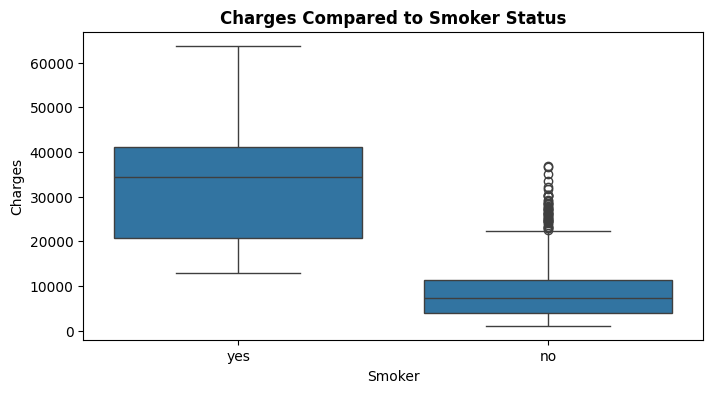

In [26]:
# Create a boxplot to look at smoker status and charges
plt.figure(figsize=(8, 4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges Compared to Smoker Status', fontweight = 'bold')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

##### My target variable is going to be charges, so I will not be looking for a class imbalance. Rather, I will look for outliers or skew.